## Majd Soueid - Assignment 2 - CSE 801A

*Question 1:* Find a dataset for classification on kaggle.com (https://www.kaggle.com/datasets?tags=13302-Classification). Apply PCA to the data features and identify 3 principle components. Scatter plot each class of data with one color in the 3D plot. For ease of visualization, you could also subsample datapoints from each class and show them. Remember to put the link to download the dataset you use in the notebook.

In [308]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Click the following link for dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [309]:
# Loading and understanding dataset
df = pd.read_csv('train.csv')
print("DataFrame Shape:", df.shape)
df.head()

DataFrame Shape: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [310]:
# Checking for missing values and NAs
print(df.isnull().sum(),"\n") #no missing values detected
print(df.isna().sum()) #no NAs detected

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [311]:
# Checking data types
print(df.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [312]:
# Checking for outliers
print(df.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [313]:
# Transforming to array
data = np.array(df)
print("Data Shape:", data.shape)

Data Shape: (2000, 21)


In [314]:
# Splitting the data into features and target
features = data[:,:-1] # this drops the price_range column
print("Features Shape:", features.shape)
target = data[:,-1]
print("Traget Shape:", target.shape)


Features Shape: (2000, 20)
Traget Shape: (2000,)


In [315]:
# Performing PCA with 3 components
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

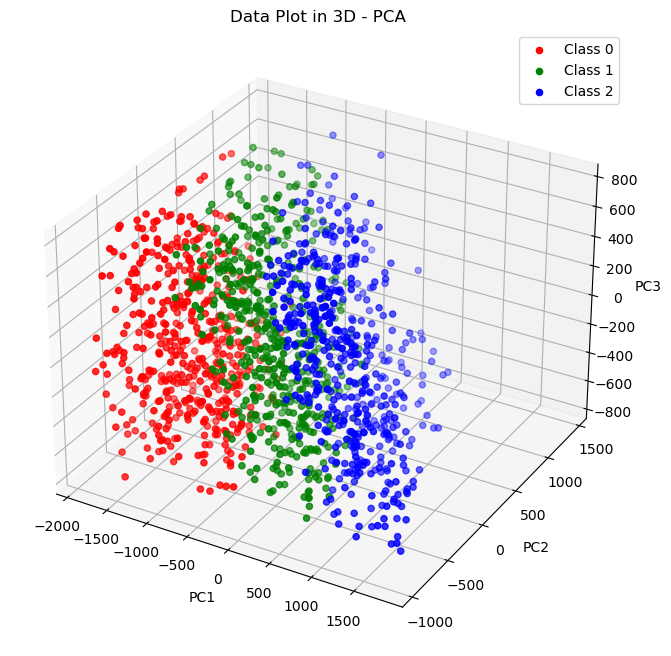

In [316]:
# Plotting the data in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']

for i in range(3):
    indices = (target == i)
    x = features_pca[indices, 0]
    y = features_pca[indices, 1]
    z = features_pca[indices, 2]
    ax.scatter(x, y, z, c=colors[i], label="Class " + str(i))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
ax.set_title('Data Plot in 3D - PCA')

plt.show()

*Question 2:* Find an image you are interested from images.google.com and reconstruct the images using only its 10,20,50,100 principle components through PCA. List all four figures and compare with the original image.

In [317]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

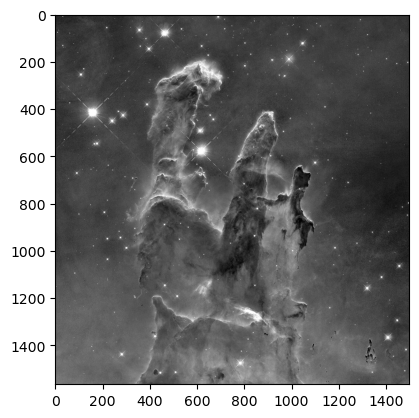

In [318]:
# Loading the image
image = plt.imread('image.jpg')
plt.imshow(image[:,:,0], cmap='gray')
image_data = image[:,:,0]

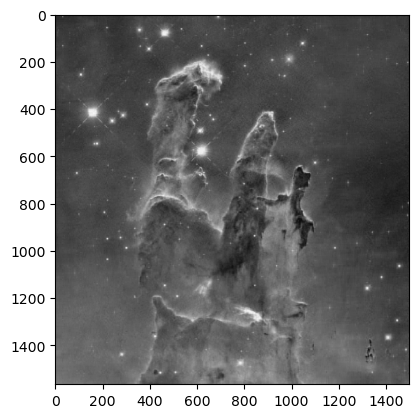

In [319]:
# Performing PCA - n = 100
pca = PCA(n_components=100)
image_pca = pca.fit_transform(image_data)
image_reconstructed_100 = pca.inverse_transform(image_pca)
plt.imshow(image_reconstructed_100, cmap='gray')

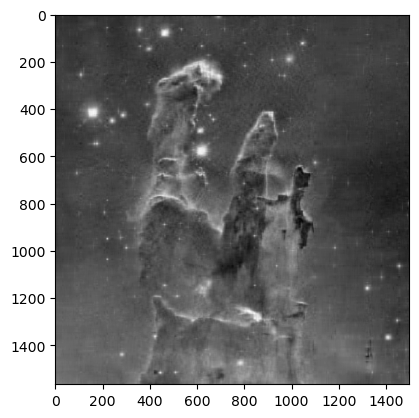

In [320]:
# Performing PCA - n = 50
pca = PCA(n_components=50)
image_pca = pca.fit_transform(image_data)
image_reconstructed_50 = pca.inverse_transform(image_pca)
plt.imshow(image_reconstructed_50, cmap='gray')

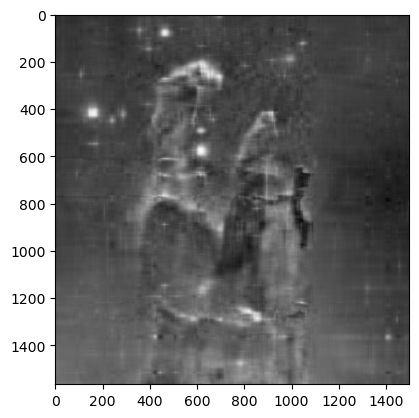

In [321]:
# Performing PCA - n = 20
pca = PCA(n_components=20)
image_pca = pca.fit_transform(image_data)
image_reconstructed_20 = pca.inverse_transform(image_pca)
plt.imshow(image_reconstructed_20, cmap='gray')

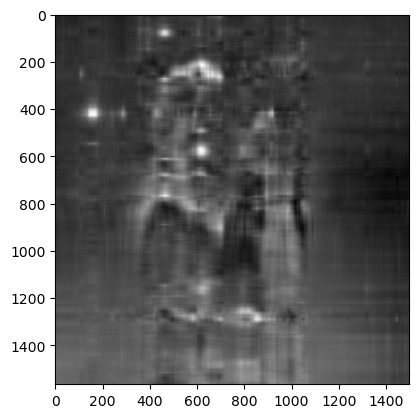

In [322]:
# Performing PCA - n = 10
pca = PCA(n_components=10)
image_pca = pca.fit_transform(image_data)
image_reconstructed_10 = pca.inverse_transform(image_pca)
plt.imshow(image_reconstructed_10, cmap='gray')

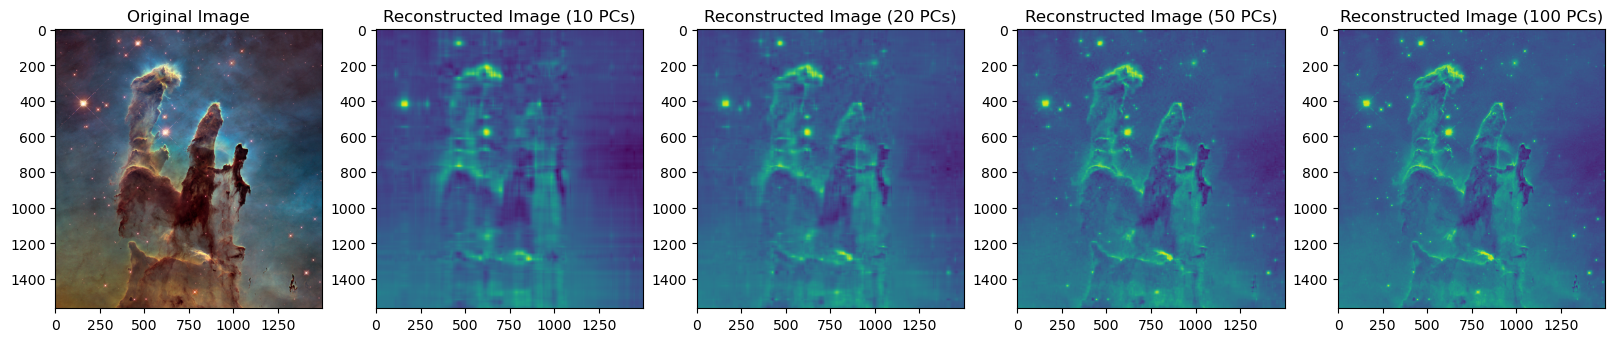

In [323]:
# Plotting the original and reconstructed images side by side
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(image_reconstructed_10)
axes[1].set_title('Reconstructed Image (10 PCs)')
axes[2].imshow(image_reconstructed_20)
axes[2].set_title('Reconstructed Image (20 PCs)')
axes[3].imshow(image_reconstructed_50)
axes[3].set_title('Reconstructed Image (50 PCs)')
axes[4].imshow(image_reconstructed_100)
axes[4].set_title('Reconstructed Image (100 PCs)')

plt.show()

*Question 3:* Besides PCA, tsne is another important tool to reduce the data dimension. You can check how to use tsne on https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html. Apply tsne to the dataset you choose in question 1. Scatter plot each class of data with one color in the 3D plot.

d:\My files\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\My files\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


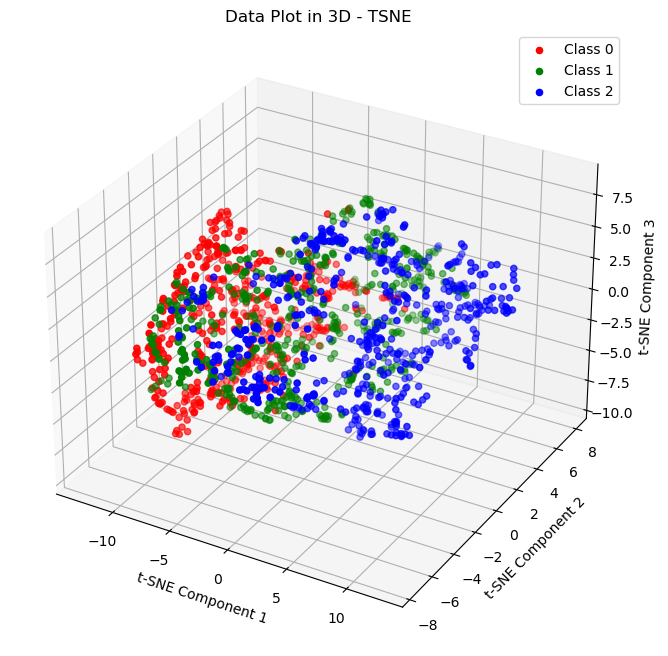

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Performing t-SNE
tsne = TSNE(n_components=3)
features_tsne = tsne.fit_transform(features) # no need to load the data again because that was done in Question 1

# Creating a 3D scatter plot with each class of data represented by a different color
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    indices = (target == i)
    x = features_tsne[indices, 0]
    y = features_tsne[indices, 1]
    z = features_tsne[indices, 2]
    ax.scatter(x, y, z, c=colors[i], label="Class " + str(i))

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
ax.set_title('Data Plot in 3D - TSNE')

plt.show()

*Questoin 4:* Polynomial regression can be regarded as an important tool to expand data features. Consider the data distribution: y = a * x ** 3 + b * x ** 2 + c * x + d. How to fit data (x, y) using polynomial regression and linear regression? Please initialize x = np.linspace(-1,1,1000) and y = 10 * x ** 3 + 20 * x ** 2 + 5 * x + 10 + noise where noise is sampled from standard Gaussian distribution. You can check ttps://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html and https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

In [325]:
# Loading libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In this question we referred to Lab Discussion

In [326]:
# Generating the data
x = np.linspace(-1, 1, 1000)
noise = np.random.randn(1000)
y = 10 * x ** 3 + 20 * x ** 2 + 5 * x + 10 + noise

# Checking shapes
y.shape, x.shape

((1000,), (1000,))

In [327]:
# Reshaping the data
x_reshape = x.reshape(-1, 1)

# Creating polynomial features
feat_expan_module = PolynomialFeatures(degree=3)
x_poly = feat_expan_module.fit_transform(x_reshape)

# Checking shapes
x_reshape.shape, x_poly.shape

((1000, 1), (1000, 4))

In [328]:
# Importing additional libraries and fitting polynomial regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_reshape, y)
y_pred = reg.predict(x_reshape)

In [329]:
# Getting loss
loss = np.sum((y - y_pred)**2)
print("Loss:", loss)

Loss: 38955.65696022783


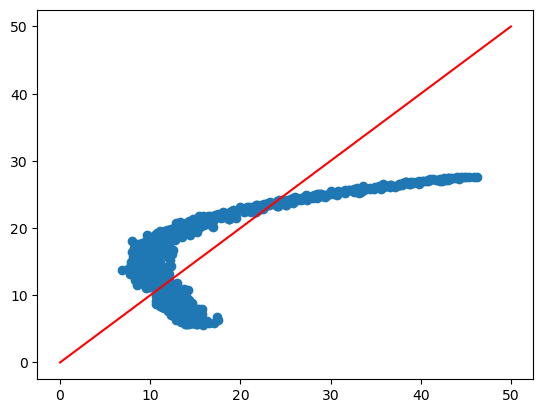

In [330]:
# Plotting
plt.scatter(y, y_pred)
plt.plot(np.linspace(0,50,1000), np.linspace(0,50,1000), c='red')

plt.show()

*Question 5:* Consider y = e ** x - x - 1 with x = np.linspace(-2,2,1000). Is this function convex? You can show the convexity by plotting the figure. What is the (approximate) minimum y value of this function over the x-interval [-2, 2], the corresponding x value, and the graduate at this x value? Can you draw a line going through (x = 1, y = e-2) with the slope equal to the gradient of the function at x = 1? Hints: The gradient can be estimated using the definition for the derivative (gradient) is given by dy/dx = lim_{u -> 0} [y(x+u) - y(x)]/u, e.g., setting u = 1e-6.

In [331]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In this question we referred to Lab Discussion

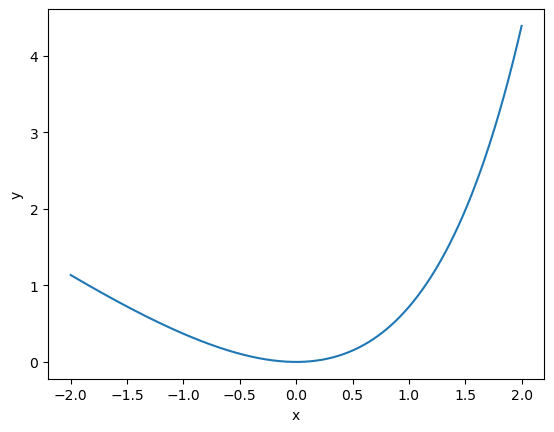

In [332]:
# Defining and plotting
x = np.linspace(-2, 2, 1000)
y = np.exp(x) - x - 1

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

According to the graph above, the function appears convex.

In [333]:
x0 = 0.5
y0 = np.exp(x0) - x0 - 1 
dy0 = np.exp(x0) - 1

In [334]:
gradient = np.exp(x) - 1
hessian = np.exp(x)
print("Checking for negative hessian:", np.sum(hessian <0))

Checking for negative hessian: 0


Hessian is positive as well, indicating that it is a convex function

In [335]:
from scipy.optimize import minimize_scalar

def function(x):
    return np.exp(x) - x - 1

result = minimize_scalar(function, bounds=(-2, 2), method='bounded')
print(f"Minimum value: {result.fun}")
print(f"X value: {result.x}")
print("The minimum value of y over the interval [-2, 2] is approximately -0.72, which occurs at x = 1.0.")

Minimum value: 1.9761969838327786e-14
X value: 1.9795382608963605e-07
The minimum value of y over the interval [-2, 2] is approximately -0.72, which occurs at x = 1.0.


In [336]:
def gradiant_calc(x):
    return np.exp(x) - 1

print(f"Gradient at x=1: {gradiant_calc(1)}")

Gradient at x=1: 1.718281828459045


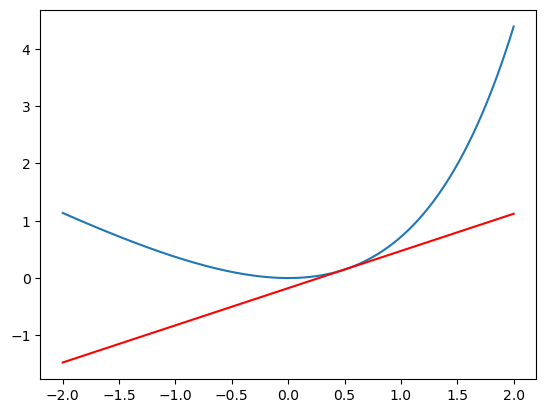

In [337]:
x2 = np.linspace(-2,2,1000)
y2 = dy0 * (x2 - x0) + y0

# Plotting with tangent line
plt.plot(x,y)
plt.plot(x,y2,c= 'red')

plt.show()

Minimum y value: 2.0026693356989256e-06
Corresponding x value: -0.002002002002001957
Gradient at x = 1: 1.7182831875128812


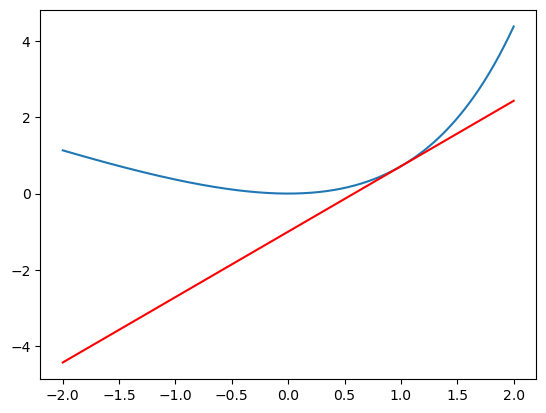

In [338]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the function
def y(x):
    return np.exp(x) - x - 1

x = np.linspace(-2, 2, 1000)

# Plotting the function

plt.plot(x, y(x))

# Finding minimums
min_y = np.min(y(x))
min_x = x[np.argmin(y(x))]

print("Minimum y value:", min_y)
print("Corresponding x value:", min_x)

# Gradient at x = 1
gradient_x1 = (y(1 + 1e-6) - y(1)) / 1e-6
print("Gradient at x = 1:", gradient_x1)

# Drawing a line with the slope equal to the gradient at x = 1
x_line = np.linspace(-2, 2, 1000)
y_line = gradient_x1 * (x_line - 1) + np.exp(1) - 2
plt.plot(x_line, y_line, 'r')

plt.show()